# **PREVENÇÃO DE DOENÇA CARDÍACA A PARTIR DE DADOS CLÍNICOS E LABORATORIAIS**

## **Descrição das colunas**

**age**: Idade

**sex**: sexo

**cp**(chest pain type (4 values)) : 

**trestbps**(resting blood pressure): pressão sanguínea em repouso.


**chol**(serum cholestoral in mg/dl): colesterol

**fbs**(fasting blood sugar > 120 mg/dl) :açícar no sangue em jejum

**restecg**(resting electrocardiographic results (values 0,1,2)): resultados eletrocardiográficos em repouso.

**thalach**(maximum heart rate achieved): frequência cardiáca máxima alcançada

**exang**(exercise induced angina): angina indizida por exercício.

**oldpeak** = ST depression induced by exercise relative to rest : depressão de ST induzida por exercício em relação ao repouso

**slope**(the slope of the peak exercise ST segment): a inclinação do segmento ST de pico do exercício

**ca**(number of major vessels (0-3) colored by flourosopy): número de vasos principais (0-3) coloridos por fluorosopia

**thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect

**target** 1 = sim, 0 = não

## 1.0 Importando as bibliotecas e carregando os dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [2]:
dados = pd.read_csv('heart.csv')
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
dados.shape

(1025, 14)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


##2.0 **EDA e  pre-processamento**




### Target

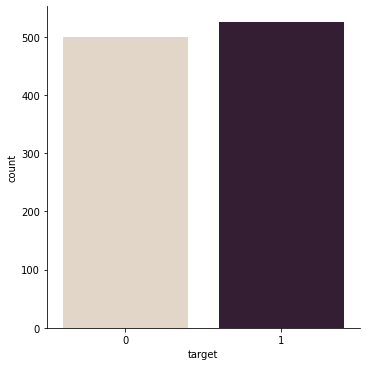

In [5]:
sns.catplot(x='target', kind='count', palette='ch:.25', data=dados)

- Visualizando a distribuição das variáveis categóricas em função da variável de saída(target).

sex:

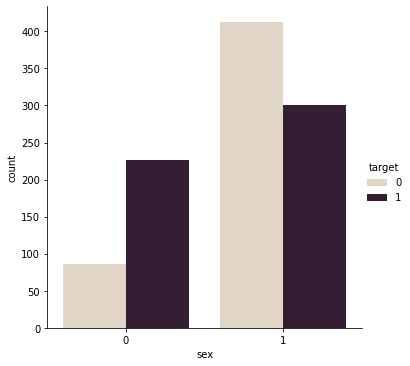

In [6]:
sns.catplot(x='sex',kind='count',hue='target',data=dados, palette='ch:.25')

cp:

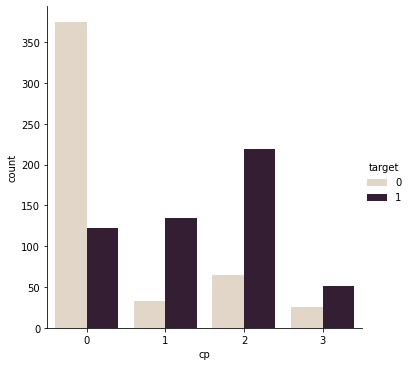

In [7]:
sns.catplot(x='cp', kind='count',hue='target', data=dados, palette='ch:.25')

fbs:

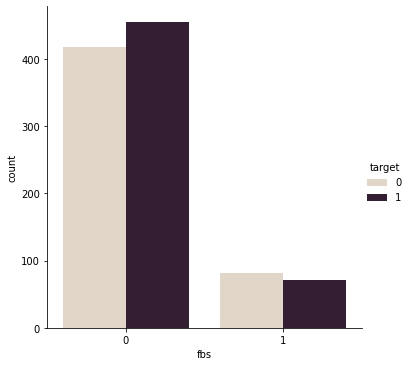

In [8]:
sns.catplot(x='fbs', kind='count',hue='target', data=dados, palette='ch:.25')

restecg:

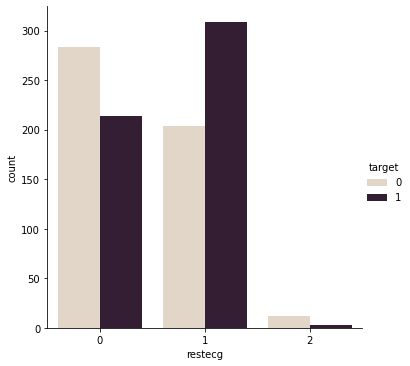

In [9]:
sns.catplot(x='restecg', kind='count',hue='target', data=dados, palette='ch:.25')

exang:

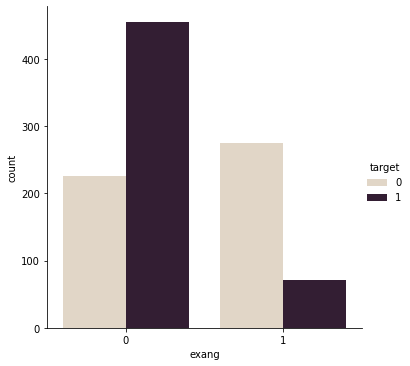

In [10]:
sns.catplot(x='exang', kind='count',hue='target', data=dados, palette='ch:.25')

slope:

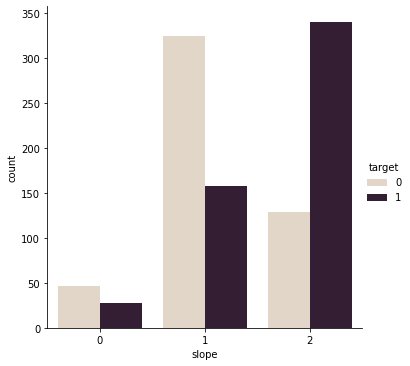

In [11]:
sns.catplot(x='slope', kind='count',hue='target', data=dados, palette='ch:.25')

ca:

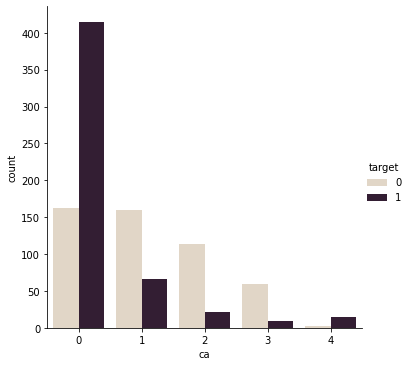

In [12]:
sns.catplot(x='ca', kind='count',hue='target', data=dados, palette='ch:.25')

thal:

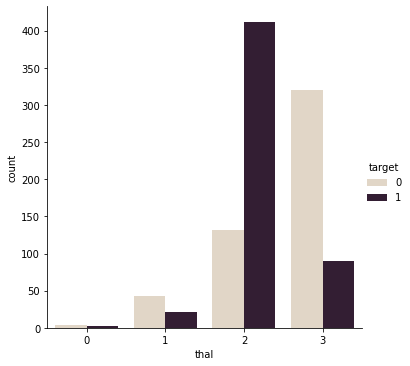

In [13]:
sns.catplot(x='thal', kind='count',hue='target', data=dados, palette='ch:.25')

- Observando as características da distribuição das variáveis numéricas.

In [14]:
dados[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


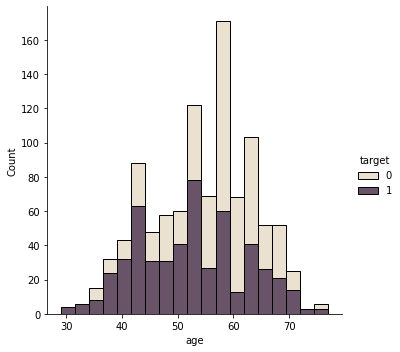

In [15]:
sns.displot(x='age', multiple='stack',hue='target',data=dados, palette='ch:.25')

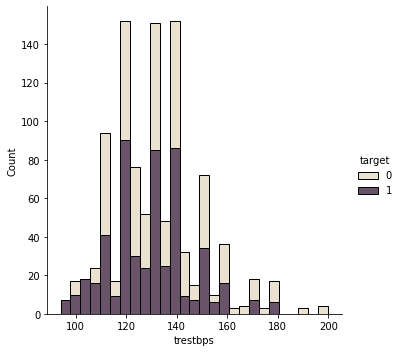

In [16]:
sns.displot(x='trestbps', multiple='stack',hue='target',data=dados,palette='ch:.25')

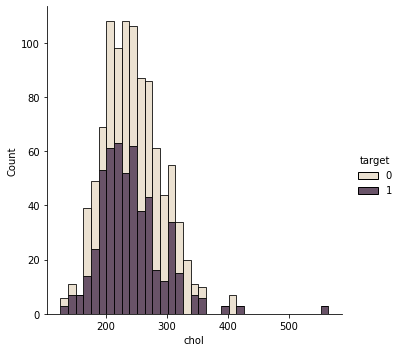

In [17]:
sns.displot(x='chol', multiple='stack',hue='target',data=dados,palette='ch:.25')

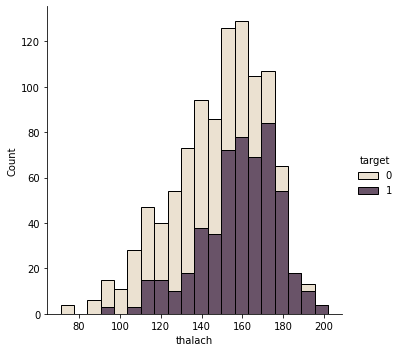

In [18]:
sns.displot(x='thalach', multiple='stack',hue='target',data=dados, palette='ch:.25')

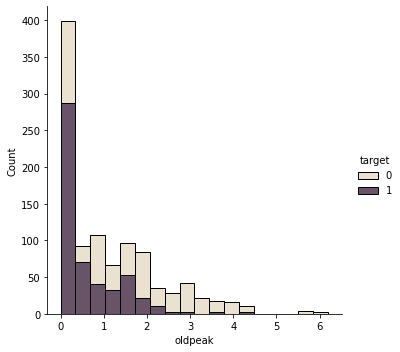

In [19]:
sns.displot(x='oldpeak', multiple='stack',hue='target',data=dados, palette='ch:.25')

##3.0 **Divisão das amostras de treino e teste e pré-processamento**

In [20]:
x = dados.drop('target',axis=1)
y = dados['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42, shuffle=True)

Normalizando os dados

In [21]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

##3.1 **Treinando o modelo:**

Grid search:

In [22]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3,5,7,9], 'weights': ['uniform','distance']}

In [23]:
grid = GridSearchCV(knn,parameters, cv=5, scoring='accuracy')
grid.fit(x_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters:

In [24]:
print(grid.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


Pegando o melhor modelo:

In [25]:
model = grid.best_estimator_

##4.0 **Avaliando o modelo:**

Acurácia:

In [26]:
model.score(x_test,y_test)

0.9853658536585366

Confusion matrix:

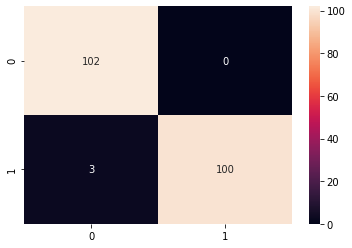

In [27]:
y_pred = model.predict(x_test)
cm = metrics.confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Sensitivity, specificity, PPV and NPV:

In [28]:
# TP = 28
# FP = 2
# TN = 27
# FN = 4
# sensitivity = TP/ (TP+FN) *100
# specificity = TN/(TN+FP) *100
# ppv = TP / (TP + FP) *100
# npv = TN/ (TN + FN) *100
# print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



AUC score:

In [30]:
y_proba = model.predict_proba(x_test)
auc = metrics.roc_auc_score(y_test, y_proba[:,1])
print(auc)

1.0


ROC curve:

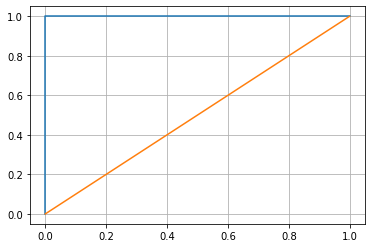

In [33]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba[:,1])
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.show()